In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import normalize

path = 'C:\Work_life\HSE_and_study\Downloads\\tumbochkina\data.csv'

I can try:

- Delete outliers (Isolation Forest)

- Take only Moscow

- Aggregate by the station and metro line (how?)


In [102]:
df = pd.read_csv(path)
df = df[df['Region'] == 'Moscow']
df.drop('Region', axis=1, inplace=True)
df = df.reset_index(drop=True)

df['Metro station'] = (df['Metro station']).apply( lambda x: x.strip() )
df.head(3)

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,108800000.0,Secondary,Чеховская,5.0,3.0,108.8,57.1,15.6,3.0,3,Without renovation
1,53000000.0,Secondary,Арбатская,9.0,3.0,96.9,59.0,11.1,2.0,5,Without renovation
2,44240000.0,Secondary,Фили,6.0,3.0,63.2,34.1,11.9,40.0,41,Designer


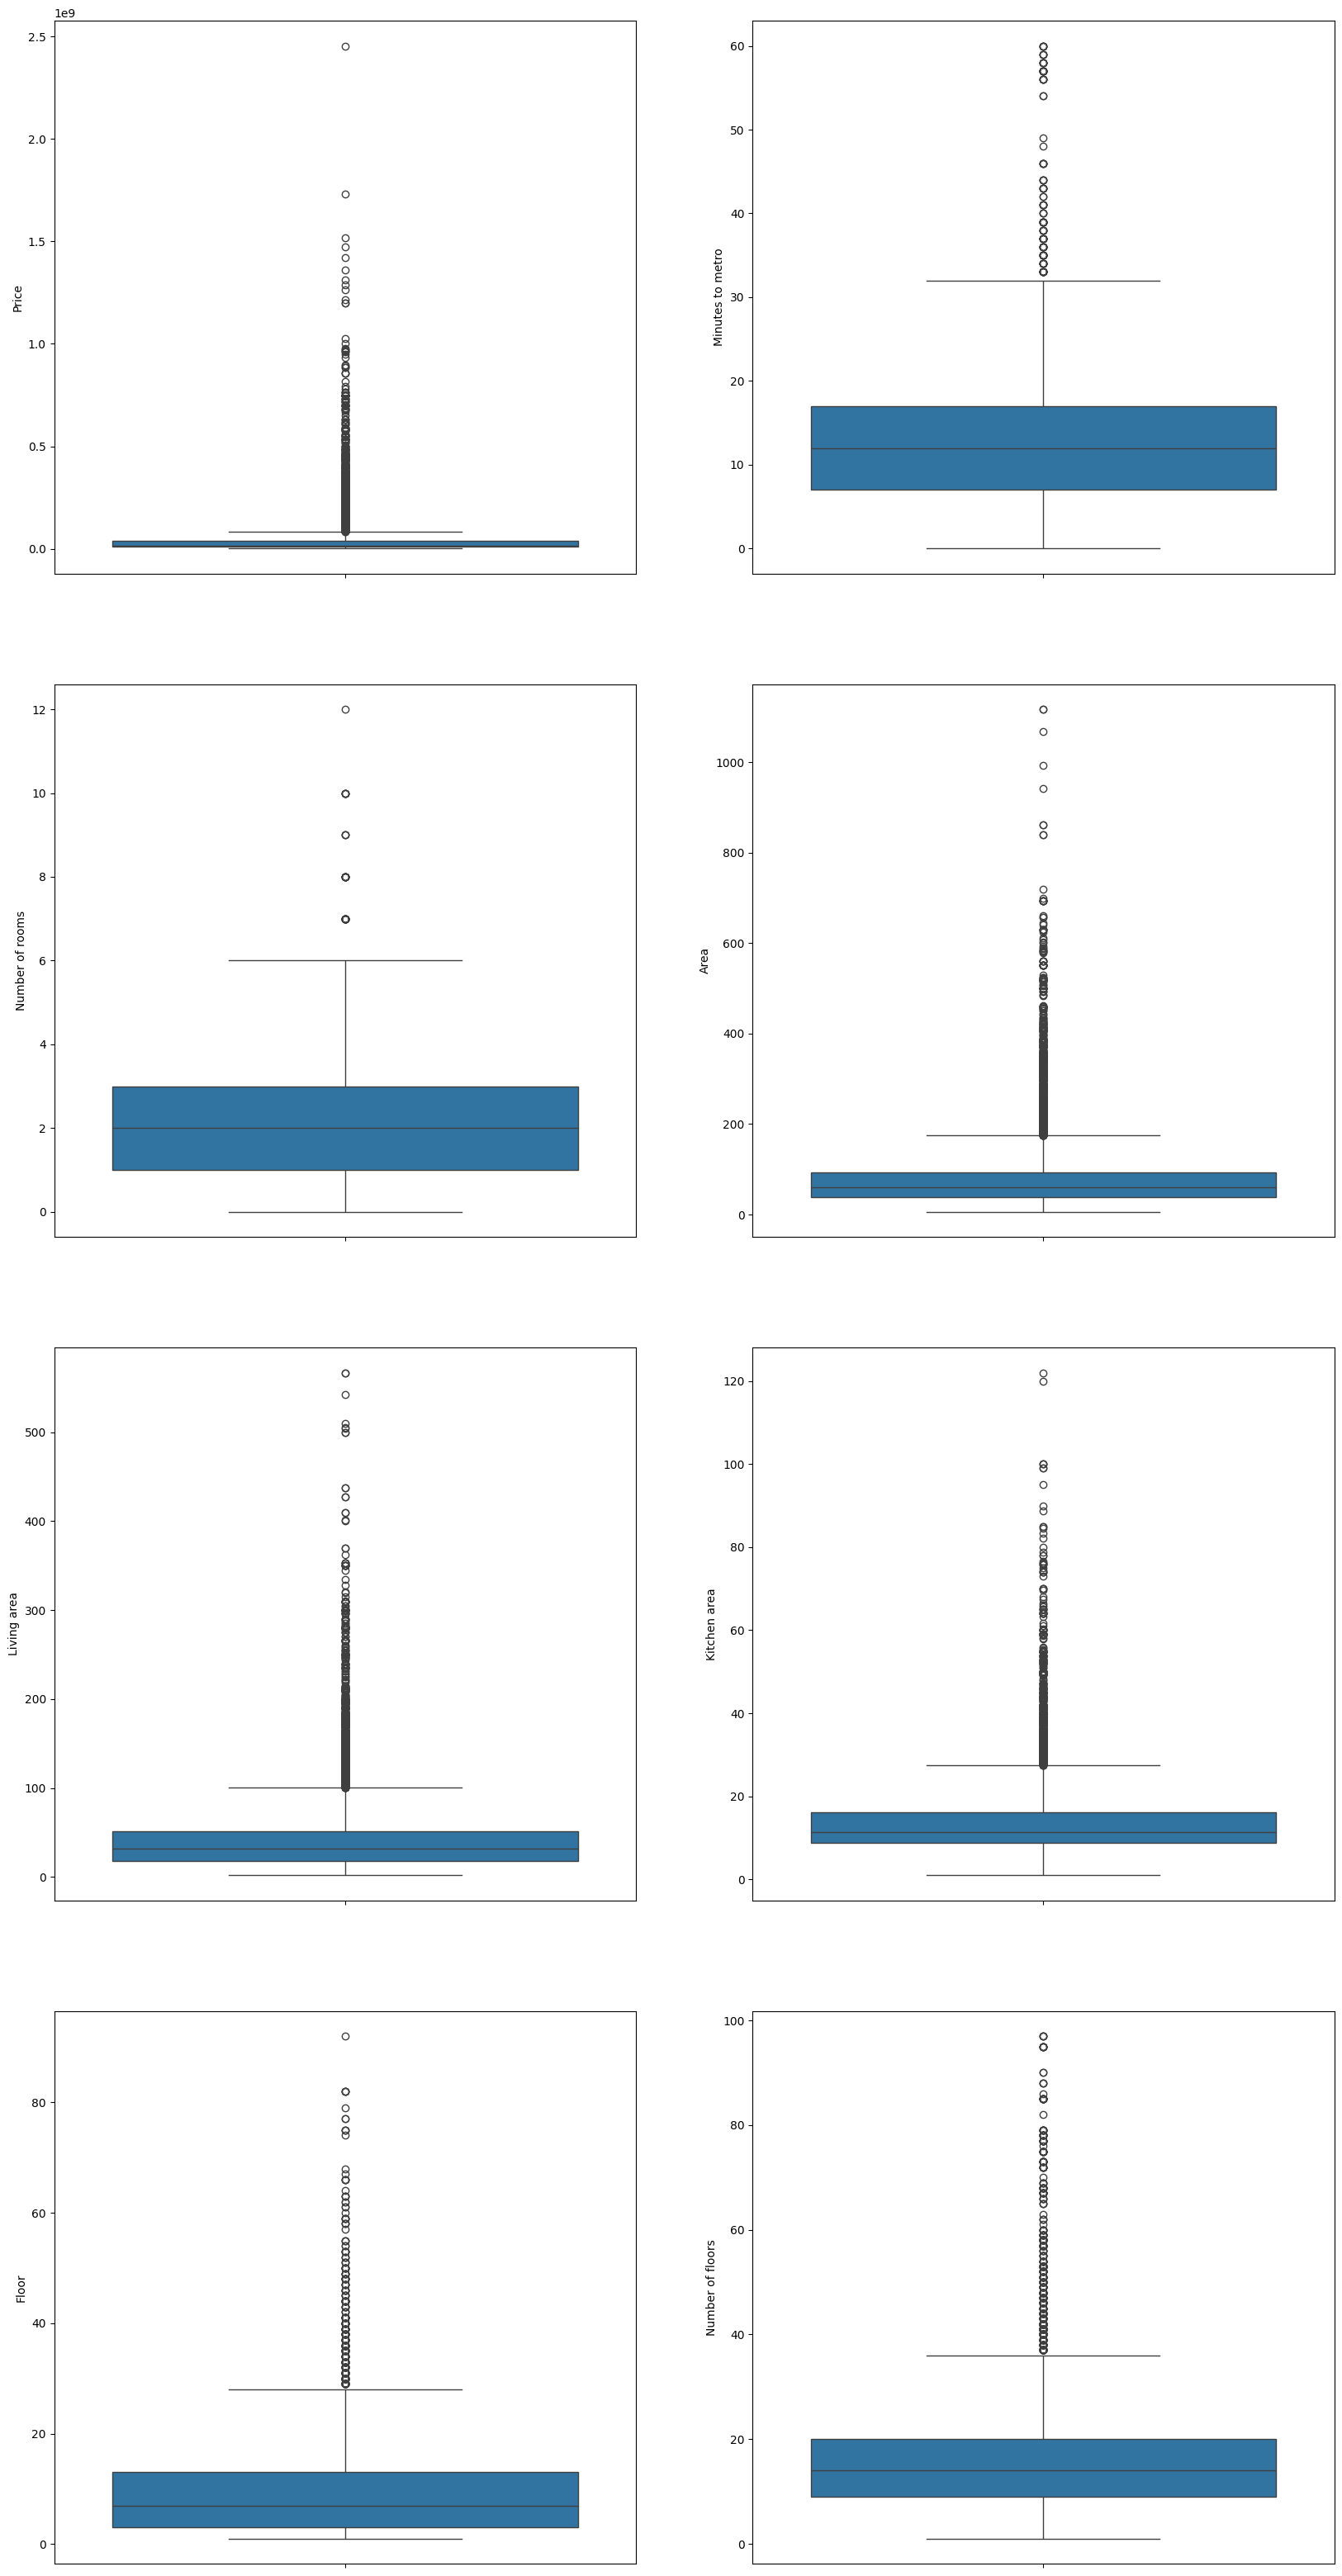

In [103]:
_, ax = plt.subplots(4, 2, figsize=(20,40))
cols = ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']

for i in range(len(cols)):
    sns.boxplot(data=df[cols[i]], ax=ax[i//2][i%2])
    

In [104]:
df.shape

(16113, 11)

In [105]:
TE = TargetEncoder(target_type='continuous')
TE.fit(pd.DataFrame(df['Metro station']), df['Price'])

scaler = StandardScaler()
df['Metro station'] = pd.DataFrame( TE.transform( pd.DataFrame( df['Metro station'] ) ) )

In [106]:
df

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,108800000.0,Secondary,8.622905e+07,5.0,3.0,108.8,57.1,15.6,3.0,3,Without renovation
1,53000000.0,Secondary,1.892202e+08,9.0,3.0,96.9,59.0,11.1,2.0,5,Without renovation
2,44240000.0,Secondary,3.942814e+07,6.0,3.0,63.2,34.1,11.9,40.0,41,Designer
3,105000000.0,Secondary,1.027208e+08,6.0,3.0,145.0,75.4,18.6,3.0,6,Designer
4,47000000.0,Secondary,1.027208e+08,9.0,3.0,103.8,59.0,15.0,6.0,6,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...
16108,14541800.0,New building,1.465929e+07,7.0,2.0,79.9,42.5,13.3,6.0,22,Cosmetic
16109,14676600.0,New building,1.465929e+07,7.0,2.0,80.2,42.7,13.3,8.0,22,Cosmetic
16110,13739550.0,New building,1.465929e+07,7.0,2.0,75.7,40.4,12.9,5.0,22,Cosmetic
16111,8000000.0,New building,1.214653e+07,7.0,1.0,40.2,18.3,9.2,15.0,13,Cosmetic


In [107]:
df = df[df['Price'] < 0.2e8]
df = df[df['Area'] < 200]
df = df[df['Minutes to metro'] < 33]

df['Minutes to metro'] = np.log10(df['Minutes to metro'] + 1e-3)
df['Area'] = np.log10(df['Area'] + 1e-3)

df.shape

(9399, 11)

In [108]:
df.drop('Living area', axis=1, inplace=True)

In [109]:
le = LabelEncoder()

df['Apartment type'] = pd.get_dummies(df['Apartment type'], drop_first=True, dtype=float)


le.fit(df['Renovation'])
df['Renovation'] = le.transform(df['Renovation'])
df.sample()

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Kitchen area,Floor,Number of floors,Renovation
3498,14500000.0,1.0,4.139048e+07,1.230474,6.0,1.477136,10.0,2.0,41,0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Price'], axis=1), df['Price'], train_size=0.8, random_state=42)

In [111]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [112]:
X_train

,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Kitchen area,Floor,Number of floors,Renovation
0,1.0,4.061756e+07,1.113977,0.0,1.505164,9.3,1.0,3,3
1,1.0,8.632733e+06,0.778224,0.0,1.000043,7.5,1.0,9,0
2,1.0,1.150240e+07,1.041432,0.0,1.823481,18.0,4.0,4,3
3,1.0,3.552873e+07,1.079217,1.0,1.624292,12.0,6.0,35,0
4,0.0,9.409796e+06,1.113977,1.0,1.528930,15.7,17.0,11,0
...,...,...,...,...,...,...,...,...,...
7514,1.0,9.879123e+06,1.146159,0.0,1.230474,8.0,8.0,9,2
7515,1.0,1.115512e+07,1.414990,0.0,1.672107,8.0,1.0,16,2
7516,1.0,4.139048e+07,1.278776,0.0,1.515887,8.0,27.0,41,3
7517,1.0,1.443585e+07,1.041432,4.0,1.791698,16.4,11.0,16,2


<Axes: >

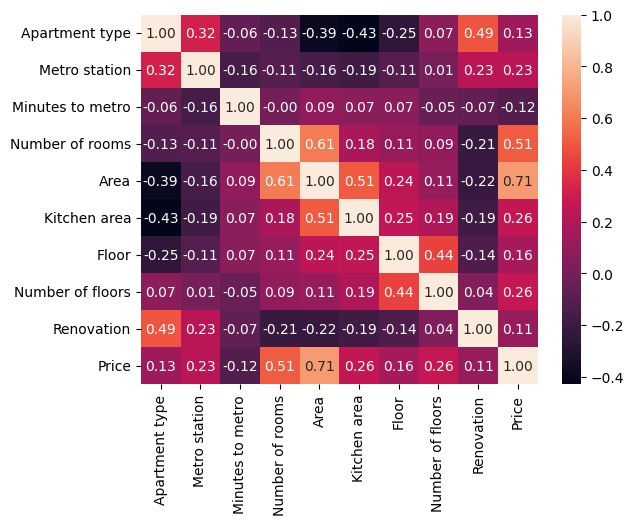

In [113]:
sns.heatmap(pd.concat((X_train, y_train), axis=1).corr(), annot=True, fmt=".2f")

In [123]:
from sklearn.metrics import r2_score

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
lin = ElasticNet(max_iter=1000, l1_ratio=0.3)
lin.fit(X_train, y_train)
prediction = lin.predict(X_test)
print(f"MAE : {mean_absolute_error(y_test, prediction)} \nR^2 : {r2_score(y_test, prediction)}")

MAE : 1936134.0919029135 
R^2 : 0.6650431337558671


In [132]:
CBR = CatBoostRegressor(verbose=False, iterations=2000, loss_function='RMSE')
CBR.fit(X_train, (y_train))
prediction = CBR.predict(X_test)
print(f"MAE : {mean_absolute_error((y_test),(prediction).round())} \nR^2 : {r2_score(y_test, (prediction).round())}")

MAE : 799811.4271276596 
R^2 : 0.9206471981576952


In [117]:
np.savetxt('arr.txt', np.abs(prediction.round() - y_test), fmt='%.3f')